In [1]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

a1 = pd.read_excel("tts evaluations/Evaluation TTS - Annotator 1.xlsx", sheet_name=None)
a2 = pd.read_excel("tts evaluations/Evaluation TTS - Annotator 2.xlsx", sheet_name=None)

def drop_hash_and_add_score(all_sheets):
    for sheet_name, df in all_sheets.items():
        if "#" in df.columns:
            all_sheets[sheet_name] = df.drop(columns=["#"])
        
        all_sheets[sheet_name]['Score'] = all_sheets[sheet_name].sum(axis=1)
    return all_sheets

a1 = drop_hash_and_add_score(a1)
a2 = drop_hash_and_add_score(a2)

In [325]:
cohen_kappa_score(
    a1["TTS 1 - Male Voice"]["Score"].to_list(),
    a2["TTS 1 - Male Voice"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.6442733846512714)

In [326]:
cohen_kappa_score(
    a1["TTS 1 - Female Voice"]["Score"].to_list(),
    a2["TTS 1 - Female Voice"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.6014877789585547)

In [327]:
cohen_kappa_score(
    a1["TTS 2 - Male Voice"]["Score"].to_list(),
    a2["TTS 2 - Male Voice"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.700813786500718)

In [328]:
cohen_kappa_score(
    a1["TTS 2 - Female Voice"]["Score"].to_list(),
    a2["TTS 2 - Female Voice"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.5785700445650068)

In [329]:
wr = 0
lr = 0
tr = 0

for i in range(len(a1["TTS 1 - Male Voice"])):
    if a1["TTS 1 - Male Voice"].iloc[i]["Score"] > a1["TTS 2 - Male Voice"].iloc[i]["Score"]:
        wr += 1
    elif a1["TTS 1 - Male Voice"].iloc[i]["Score"] < a1["TTS 2 - Male Voice"].iloc[i]["Score"]:
        lr += 1
    else:
        tr += 1

In [330]:
wr/50 * 100

50.0

In [331]:
tr/50 * 100

28.000000000000004

In [332]:
lr/50 * 100

22.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

plt.rcParams.update({'font.size': 16})

def radar_chart_side_by_side(df1_1, df1_2, df2_1, df2_2):
    categories = list(df1_1.columns)
    N = len(categories)

    scores_annotator1_xttsv2 = df1_1.mean().tolist()
    scores_annotator1_styletts = df1_2.mean().tolist()
    scores_annotator2_xttsv2 = df2_1.mean().tolist()
    scores_annotator2_styletts = df2_2.mean().tolist()

    scores_annotator1_xttsv2 += scores_annotator1_xttsv2[:1]
    scores_annotator1_styletts += scores_annotator1_styletts[:1]
    scores_annotator2_xttsv2 += scores_annotator2_xttsv2[:1]
    scores_annotator2_styletts += scores_annotator2_styletts[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(38, 18), subplot_kw=dict(polar=True))

    ax1.grid(linewidth=3.5, linestyle='--', color='gray')

    ax1.plot(angles, scores_annotator1_xttsv2, linewidth=6, linestyle='solid', color='#A7C7E7')
    ax1.fill(angles, scores_annotator1_xttsv2, color='#A7C7E7', alpha=0.5)
    ax1.plot(angles, scores_annotator1_styletts, linewidth=6, linestyle='solid', color='#C3B1E1')
    ax1.fill(angles, scores_annotator1_styletts, color='#C3B1E1', alpha=0.5)
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(categories, fontsize=44)
    ax1.set_ylim(0, 2)
    ax1.set_yticks([0.5, 1, 1.5, 2])
    ax1.set_yticklabels(['0.5', '1', '1.5', '2'], fontsize=38)

    ax2.grid(linewidth=3.5, linestyle='--', color='gray')
    ax2.plot(angles, scores_annotator2_xttsv2, linewidth=6, linestyle='solid', label='XTTSv2', color='#A7C7E7')
    ax2.fill(angles, scores_annotator2_xttsv2, color='#A7C7E7', alpha=0.5)
    ax2.plot(angles, scores_annotator2_styletts, linewidth=6, linestyle='solid', label='StyleTTS 2', color='#C3B1E1')
    ax2.fill(angles, scores_annotator2_styletts, color='#C3B1E1', alpha=0.5)
    ax2.set_xticks(angles[:-1])
    ax2.set_xticklabels(categories, fontsize=44)
    ax2.set_ylim(0, 2)
    ax2.set_yticks([0.5, 1, 1.5, 2])
    ax2.set_yticklabels(['0.5', '1', '1.5', '2'], fontsize=38)
    ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 0.95), fontsize=38)

    plt.tight_layout()
    plt.savefig("female-tts-comparison.png", format="png", dpi=300)
    plt.show()

df_anime1 = a1["TTS 1 - Female Voice"].drop("Score", axis=1)
df_anime2 = a1["TTS 2 - Female Voice"].drop("Score", axis=1)

df_anime3 = a2["TTS 1 - Female Voice"].drop("Score", axis=1)
df_anime4 = a2["TTS 2 - Female Voice"].drop("Score", axis=1)

df_anime1["Voice Cloning"] = 1
df_anime2["Voice Cloning"] = 1
df_anime3["Voice Cloning"] = 1
df_anime4["Voice Cloning"] = 1

# Call the updated radar chart function for side-by-side plots
radar_chart_side_by_side(df_anime1, df_anime2, df_anime3, df_anime4)


In [390]:
!pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:02


In [68]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

a1 = pd.read_excel("ttv evaluations/Evaluation TTV - Annotator 1.xlsx", sheet_name=None)
a2 = pd.read_excel("ttv evaluations/Evaluation TTV - Annotator 2.xlsx", sheet_name=None)

def drop_hash_and_add_score(all_sheets):
    for sheet_name, df in all_sheets.items():
        if "#" in df.columns:
            all_sheets[sheet_name] = df.drop(columns=["#"])
        
        all_sheets[sheet_name]['Score'] = all_sheets[sheet_name].sum(axis=1)
    return all_sheets

a1 = drop_hash_and_add_score(a1)
a2 = drop_hash_and_add_score(a2)

In [69]:
cohen_kappa_score(
    a1["Cartoon"]["Score"].to_list(),
    a2["Cartoon"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.615631005765535)

In [70]:
cohen_kappa_score(
    a1["Anime"]["Score"].to_list(),
    a2["Anime"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.6259253425736336)

In [71]:
cohen_kappa_score(
    a1["Animated"]["Score"].to_list(),
    a2["Animated"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.6351197263397947)

In [72]:
from matplotlib import pyplot as plt

df_anime = a1["Anime"].drop("Score", axis=1)
df_anime2 = a2["Anime"].drop("Score", axis=1)

In [89]:
wr = 0
lr = 0
tr = 0

for i in range(len(a1["Cartoon"])):
    if a2["Anime"].iloc[i]["Score"] > a2["Animated"].iloc[i]["Score"]:
        wr += 1
    elif a2["Anime"].iloc[i]["Score"] < a2["Animated"].iloc[i]["Score"]:
        lr += 1
    else:
        tr += 1

In [90]:
wr/50 * 100

34.0

In [91]:
tr/50 * 100

34.0

In [92]:
lr/50 * 100

32.0

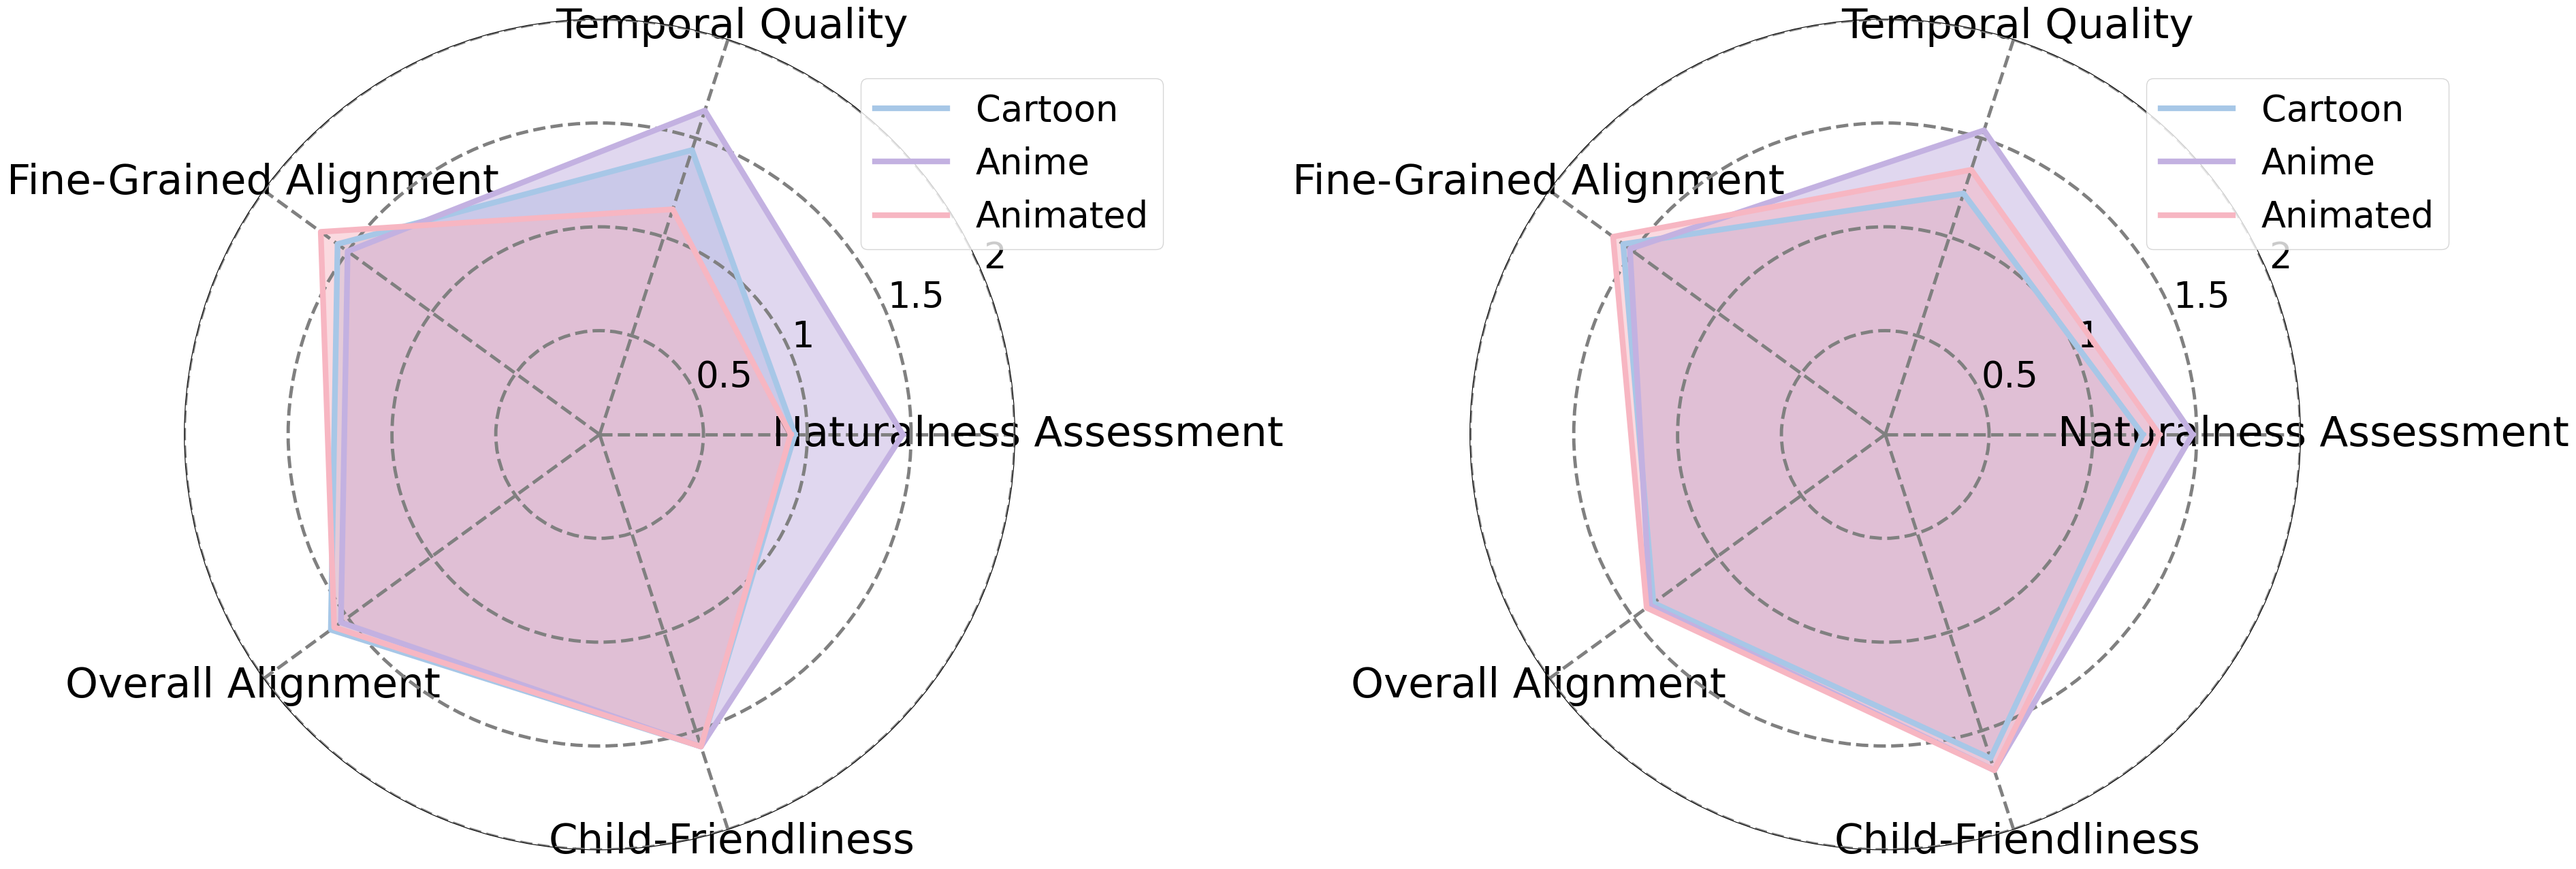

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

plt.rcParams.update({'font.size': 16})

def radar_chart_side_by_side(df1_1, df1_2, df1_3, df2_1, df2_2, df2_3):
    categories = list(df1_1.columns)
    N = len(categories)

    scores_annotator1_cartoon = df1_1.mean().tolist()
    scores_annotator1_anime = df1_2.mean().tolist()
    scores_annotator1_animated = df1_3.mean().tolist()

    scores_annotator2_cartoon = df2_1.mean().tolist()
    scores_annotator2_anime = df2_2.mean().tolist()
    scores_annotator2_animated = df2_3.mean().tolist()

    scores_annotator1_cartoon += scores_annotator1_cartoon[:1]
    scores_annotator1_anime += scores_annotator1_anime[:1]
    scores_annotator1_animated += scores_annotator1_animated[:1]
    
    scores_annotator2_cartoon += scores_annotator2_cartoon[:1]
    scores_annotator2_anime += scores_annotator2_anime[:1]
    scores_annotator2_animated += scores_annotator2_animated[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(38, 18), subplot_kw=dict(polar=True))

    ax1.grid(linewidth=3.5, linestyle='--', color='gray')

    ax1.plot(angles, scores_annotator1_cartoon, linewidth=6, linestyle='solid', label='Cartoon', color='#A7C7E7')
    ax1.fill(angles, scores_annotator1_cartoon, color='#A7C7E7', alpha=0.5)

    ax1.plot(angles, scores_annotator1_anime, linewidth=6, linestyle='solid', label='Anime', color='#C3B1E1')
    ax1.fill(angles, scores_annotator1_anime, color='#C3B1E1', alpha=0.5)

    ax1.plot(angles, scores_annotator1_animated, linewidth=6, linestyle='solid', label='Animated', color='#F7B6C2')
    ax1.fill(angles, scores_annotator1_animated, color='#F7B6C2', alpha=0.5)

    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(categories, fontsize=44)
    ax1.set_ylim(0, 2)
    ax1.set_yticks([0.5, 1, 1.5, 2])
    ax1.set_yticklabels(['0.5', '1', '1.5', '2'], fontsize=38)
    ax1.legend(loc='upper right', bbox_to_anchor=(1.2, 0.95), fontsize=38)

    ax2.grid(linewidth=3.5, linestyle='--', color='gray')

    ax2.plot(angles, scores_annotator2_cartoon, linewidth=6, linestyle='solid', label='Cartoon', color='#A7C7E7')
    ax2.fill(angles, scores_annotator2_cartoon, color='#A7C7E7', alpha=0.5)

    ax2.plot(angles, scores_annotator2_anime, linewidth=6, linestyle='solid', label='Anime', color='#C3B1E1')
    ax2.fill(angles, scores_annotator2_anime, color='#C3B1E1', alpha=0.5)

    ax2.plot(angles, scores_annotator2_animated, linewidth=6, linestyle='solid', label='Animated', color='#F7B6C2')
    ax2.fill(angles, scores_annotator2_animated, color='#F7B6C2', alpha=0.5)

    ax2.set_xticks(angles[:-1])
    ax2.set_xticklabels(categories, fontsize=44)
    ax2.set_ylim(0, 2)
    ax2.set_yticks([0.5, 1, 1.5, 2])
    ax2.set_yticklabels(['0.5', '1', '1.5', '2'], fontsize=38)
    ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 0.95), fontsize=38)

    plt.tight_layout()
    plt.savefig("ttv-comparison.png", format="png", dpi=300)
    plt.show()

df_anime1 = a1["Cartoon"].drop("Score", axis=1)
df_anime2 = a1["Anime"].drop("Score", axis=1)
df_anime3 = a1["Animated"].drop("Score", axis=1)

df_anime4 = a2["Cartoon"].drop("Score", axis=1)
df_anime5 = a2["Anime"].drop("Score", axis=1)
df_anime6 = a2["Animated"].drop("Score", axis=1)

radar_chart_side_by_side(df_anime1, df_anime2, df_anime3, df_anime4, df_anime5, df_anime6)


In [31]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

a1 = pd.read_excel("story generation evaluation/Evaluation - Annotator 1.xlsx", sheet_name=None)
a2 = pd.read_excel("story generation evaluation/Evaluation - Annotator 2.xlsx", sheet_name=None)

def drop_hash_and_add_score(all_sheets):
    for sheet_name, df in all_sheets.items():
        if "#" in df.columns:
            all_sheets[sheet_name] = df.drop(columns=["#"])
        
        all_sheets[sheet_name]['Score'] = all_sheets[sheet_name].sum(axis=1)
    return all_sheets

a1 = drop_hash_and_add_score(a1)
a2 = drop_hash_and_add_score(a2)

In [7]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

def combine_and_average_scores(a1, a2):
    combined_data = []
    
    for model in a1.keys():
        df1 = a1[model][['Score']].copy()
        df2 = a2[model][['Score']].copy()

        df_avg = pd.DataFrame()
        df_avg['Score'] = (df1['Score'] + df2['Score']) / 2

        df_avg['Model'] = model

        combined_data.append(df_avg)

    combined_df = pd.concat(combined_data, ignore_index=True)
    return combined_df

combined_scores = combine_and_average_scores(a1, a2)

model_groups = [group['Score'].values for name, group in combined_scores.groupby('Model')]
f_statistic, p_value = stats.f_oneway(*model_groups)

if p_value < 0.05:
    print(f"ANOVA Result: Significant difference found (p-value = {p_value:.4f}). Proceeding with Tukey's HSD.")
    
    # Tukey's HSD test to compare models
    tukey = pairwise_tukeyhsd(endog=combined_scores['Score'],     # Scores to compare
                              groups=combined_scores['Model'],    # Groups to compare
                              alpha=0.05)                         # Significance level
    
    # Print the results of Tukey's HSD
    print(tukey)
    
    # Get summary in a readable format
    tukey_results = pd.DataFrame(data=tukey.summary().data[1:], columns=tukey.summary().data[0])
    print("\nTukey HSD Results:")
    print(tukey_results)
    
    # Determine the best model (the one with the highest mean and significant difference)
    best_model = combined_scores.groupby('Model')['Score'].mean().idxmax()
    print(f"\nThe model with the highest mean score is: {best_model}")
else:
    print(f"ANOVA Result: No significant difference found (p-value = {p_value:.4f}).")


ANOVA Result: Significant difference found (p-value = 0.0056). Proceeding with Tukey's HSD.
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------
       GPT-4o   GPT-4o-mini     0.84 0.0178  0.0914 1.5886   True
       GPT-4o   Gemma-2-27b     0.32 0.8238 -0.4286 1.0686  False
       GPT-4o    Gemma-2-9b     0.65 0.1302 -0.0986 1.3986  False
       GPT-4o Llama-3.1-70b     0.74 0.0547 -0.0086 1.4886  False
       GPT-4o  Llama-3.1-8b     0.85 0.0158  0.1014 1.5986   True
  GPT-4o-mini   Gemma-2-27b    -0.52 0.3491 -1.2686 0.2286  False
  GPT-4o-mini    Gemma-2-9b    -0.19 0.9784 -0.9386 0.5586  False
  GPT-4o-mini Llama-3.1-70b     -0.1 0.9989 -0.8486 0.6486  False
  GPT-4o-mini  Llama-3.1-8b     0.01    1.0 -0.7386 0.7586  False
  Gemma-2-27b    Gemma-2-9b     0.33 0.8041 -0.4186 1.0786  False
  Gemma-2-27b Llama-3.1-70b     0.42  0.593 -0.328

In [165]:
cohen_kappa_score(
    a1["GPT-4o"]["Score"].to_list(),
    a2["GPT-4o"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.8833243582839706)

In [166]:
cohen_kappa_score(
    a1["GPT-4o-mini"]["Score"].to_list(),
    a2["GPT-4o-mini"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.928896473265074)

In [167]:
cohen_kappa_score(
    a1["Llama-3.1-8b"]["Score"].to_list(),
    a2["Llama-3.1-8b"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.9227110582639715)

In [168]:
cohen_kappa_score(
    a1["Llama-3.1-70b"]["Score"].to_list(),
    a2["Llama-3.1-70b"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.9249088178502467)

In [169]:
cohen_kappa_score(
    a1["Gemma-2-9b"]["Score"].to_list(),
    a2["Gemma-2-9b"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.9136786188579017)

In [170]:
cohen_kappa_score(
    a1["Gemma-2-27b"]["Score"].to_list(),
    a2["Gemma-2-27b"]["Score"].to_list(),
    weights="quadratic"
)

np.float64(0.9239626330653922)

In [105]:
wr = 0
lr = 0
tr = 0

for i in range(len(a1["Llama-3.1-8b"])):
    if a1["GPT-4o-mini"].iloc[i]["Score"] > a1["GPT-4o"].iloc[i]["Score"]:
        wr += 1
    if a1["GPT-4o-mini"].iloc[i]["Score"] < a1["GPT-4o"].iloc[i]["Score"]:
        lr += 1
    if a1["GPT-4o-mini"].iloc[i]["Score"] == a1["GPT-4o"].iloc[i]["Score"]:
        tr += 1

In [106]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(60.0, 22.0, 18.0)

In [107]:
wr = 0
lr = 0
tr = 0

for i in range(len(a1["Llama-3.1-8b"])):
    if a1["Gemma-2-9b"].iloc[i]["Score"] > a1["Gemma-2-27b"].iloc[i]["Score"]:
        wr += 1
    if a1["Gemma-2-9b"].iloc[i]["Score"] < a1["Gemma-2-27b"].iloc[i]["Score"]:
        lr += 1
    if a1["Gemma-2-9b"].iloc[i]["Score"] == a1["Gemma-2-27b"].iloc[i]["Score"]:
        tr += 1

In [108]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(36.0, 42.0, 22.0)

In [109]:
wr = 0
lr = 0
tr = 0

for i in range(len(a1["Llama-3.1-8b"])):
    if a1["Llama-3.1-8b"].iloc[i]["Score"] > a1["Llama-3.1-70b"].iloc[i]["Score"]:
        wr += 1
    if a1["Llama-3.1-8b"].iloc[i]["Score"] < a1["Llama-3.1-70b"].iloc[i]["Score"]:
        lr += 1
    if a1["Llama-3.1-8b"].iloc[i]["Score"] == a1["Llama-3.1-70b"].iloc[i]["Score"]:
        tr += 1

In [110]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(32.0, 46.0, 22.0)

In [111]:
wr = 0
lr = 0
tr = 0

for i in range(len(a1["Llama-3.1-8b"])):
    if a1["Llama-3.1-8b"].iloc[i]["Score"] > a1["Gemma-2-9b"].iloc[i]["Score"]:
        wr += 1
    if a1["Llama-3.1-8b"].iloc[i]["Score"] < a1["Gemma-2-9b"].iloc[i]["Score"]:
        lr += 1
    if a1["Llama-3.1-8b"].iloc[i]["Score"] == a1["Gemma-2-9b"].iloc[i]["Score"]:
        tr += 1

In [112]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(40.0, 30.0, 30.0)

In [126]:
wr = 0
lr = 0
tr = 0

for i in range(len(a1["Gemma-2-9b"])):
    if a1["Gemma-2-9b"].iloc[i]["Score"] > a1["GPT-4o-mini"].iloc[i]["Score"]:
        wr += 1
    if a1["Gemma-2-9b"].iloc[i]["Score"] < a1["GPT-4o-mini"].iloc[i]["Score"]:
        lr += 1
    if a1["Gemma-2-9b"].iloc[i]["Score"] == a1["GPT-4o-mini"].iloc[i]["Score"]:
        tr += 1

In [127]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(38.0, 18.0, 44.0)

In [113]:
wr = 0
lr = 0
tr = 0

for i in range(len(a1["Llama-3.1-8b"])):
    if a1["Llama-3.1-8b"].iloc[i]["Score"] > a1["GPT-4o-mini"].iloc[i]["Score"]:
        wr += 1
    if a1["Llama-3.1-8b"].iloc[i]["Score"] < a1["GPT-4o-mini"].iloc[i]["Score"]:
        lr += 1
    if a1["Llama-3.1-8b"].iloc[i]["Score"] == a1["GPT-4o-mini"].iloc[i]["Score"]:
        tr += 1

In [115]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(34.0, 28.000000000000004, 38.0)

In [128]:
wr = 0
lr = 0
tr = 0

for i in range(len(a2["Llama-3.1-8b"])):
    if a2["GPT-4o-mini"].iloc[i]["Score"] > a2["GPT-4o"].iloc[i]["Score"]:
        wr += 1
    if a2["GPT-4o-mini"].iloc[i]["Score"] < a2["GPT-4o"].iloc[i]["Score"]:
        lr += 1
    if a2["GPT-4o-mini"].iloc[i]["Score"] == a2["GPT-4o"].iloc[i]["Score"]:
        tr += 1

In [129]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(54.0, 30.0, 16.0)

In [118]:
wr = 0
lr = 0
tr = 0

for i in range(len(a2["Llama-3.1-8b"])):
    if a2["Gemma-2-9b"].iloc[i]["Score"] > a2["Gemma-2-27b"].iloc[i]["Score"]:
        wr += 1
    if a2["Gemma-2-9b"].iloc[i]["Score"] < a2["Gemma-2-27b"].iloc[i]["Score"]:
        lr += 1
    if a2["Gemma-2-9b"].iloc[i]["Score"] == a2["Gemma-2-27b"].iloc[i]["Score"]:
        tr += 1

In [119]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(48.0, 26.0, 26.0)

In [120]:
wr = 0
lr = 0
tr = 0

for i in range(len(a2["Llama-3.1-8b"])):
    if a2["Llama-3.1-8b"].iloc[i]["Score"] > a2["Llama-3.1-70b"].iloc[i]["Score"]:
        wr += 1
    if a2["Llama-3.1-8b"].iloc[i]["Score"] < a2["Llama-3.1-70b"].iloc[i]["Score"]:
        lr += 1
    if a2["Llama-3.1-8b"].iloc[i]["Score"] == a2["Llama-3.1-70b"].iloc[i]["Score"]:
        tr += 1

In [121]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(34.0, 40.0, 26.0)

In [122]:
wr = 0
lr = 0
tr = 0

for i in range(len(a2["Llama-3.1-8b"])):
    if a2["Llama-3.1-8b"].iloc[i]["Score"] > a2["Gemma-2-9b"].iloc[i]["Score"]:
        wr += 1
    if a2["Llama-3.1-8b"].iloc[i]["Score"] < a2["Gemma-2-9b"].iloc[i]["Score"]:
        lr += 1
    if a2["Llama-3.1-8b"].iloc[i]["Score"] == a2["Gemma-2-9b"].iloc[i]["Score"]:
        tr += 1

In [123]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(46.0, 20.0, 34.0)

In [130]:
wr = 0
lr = 0
tr = 0

for i in range(len(a2["Llama-3.1-8b"])):
    if a2["Gemma-2-9b"].iloc[i]["Score"] > a2["GPT-4o-mini"].iloc[i]["Score"]:
        wr += 1
    if a2["Gemma-2-9b"].iloc[i]["Score"] < a2["GPT-4o-mini"].iloc[i]["Score"]:
        lr += 1
    if a2["Gemma-2-9b"].iloc[i]["Score"] == a2["GPT-4o-mini"].iloc[i]["Score"]:
        tr += 1

In [131]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(36.0, 18.0, 46.0)

In [124]:
wr = 0
lr = 0
tr = 0

for i in range(len(a2["Llama-3.1-8b"])):
    if a2["Llama-3.1-8b"].iloc[i]["Score"] > a2["GPT-4o-mini"].iloc[i]["Score"]:
        wr += 1
    if a2["Llama-3.1-8b"].iloc[i]["Score"] < a2["GPT-4o-mini"].iloc[i]["Score"]:
        lr += 1
    if a2["Llama-3.1-8b"].iloc[i]["Score"] == a2["GPT-4o-mini"].iloc[i]["Score"]:
        tr += 1

In [125]:
(wr/50 * 100), (tr/50 * 100), (lr/50 * 100)

(32.0, 30.0, 38.0)

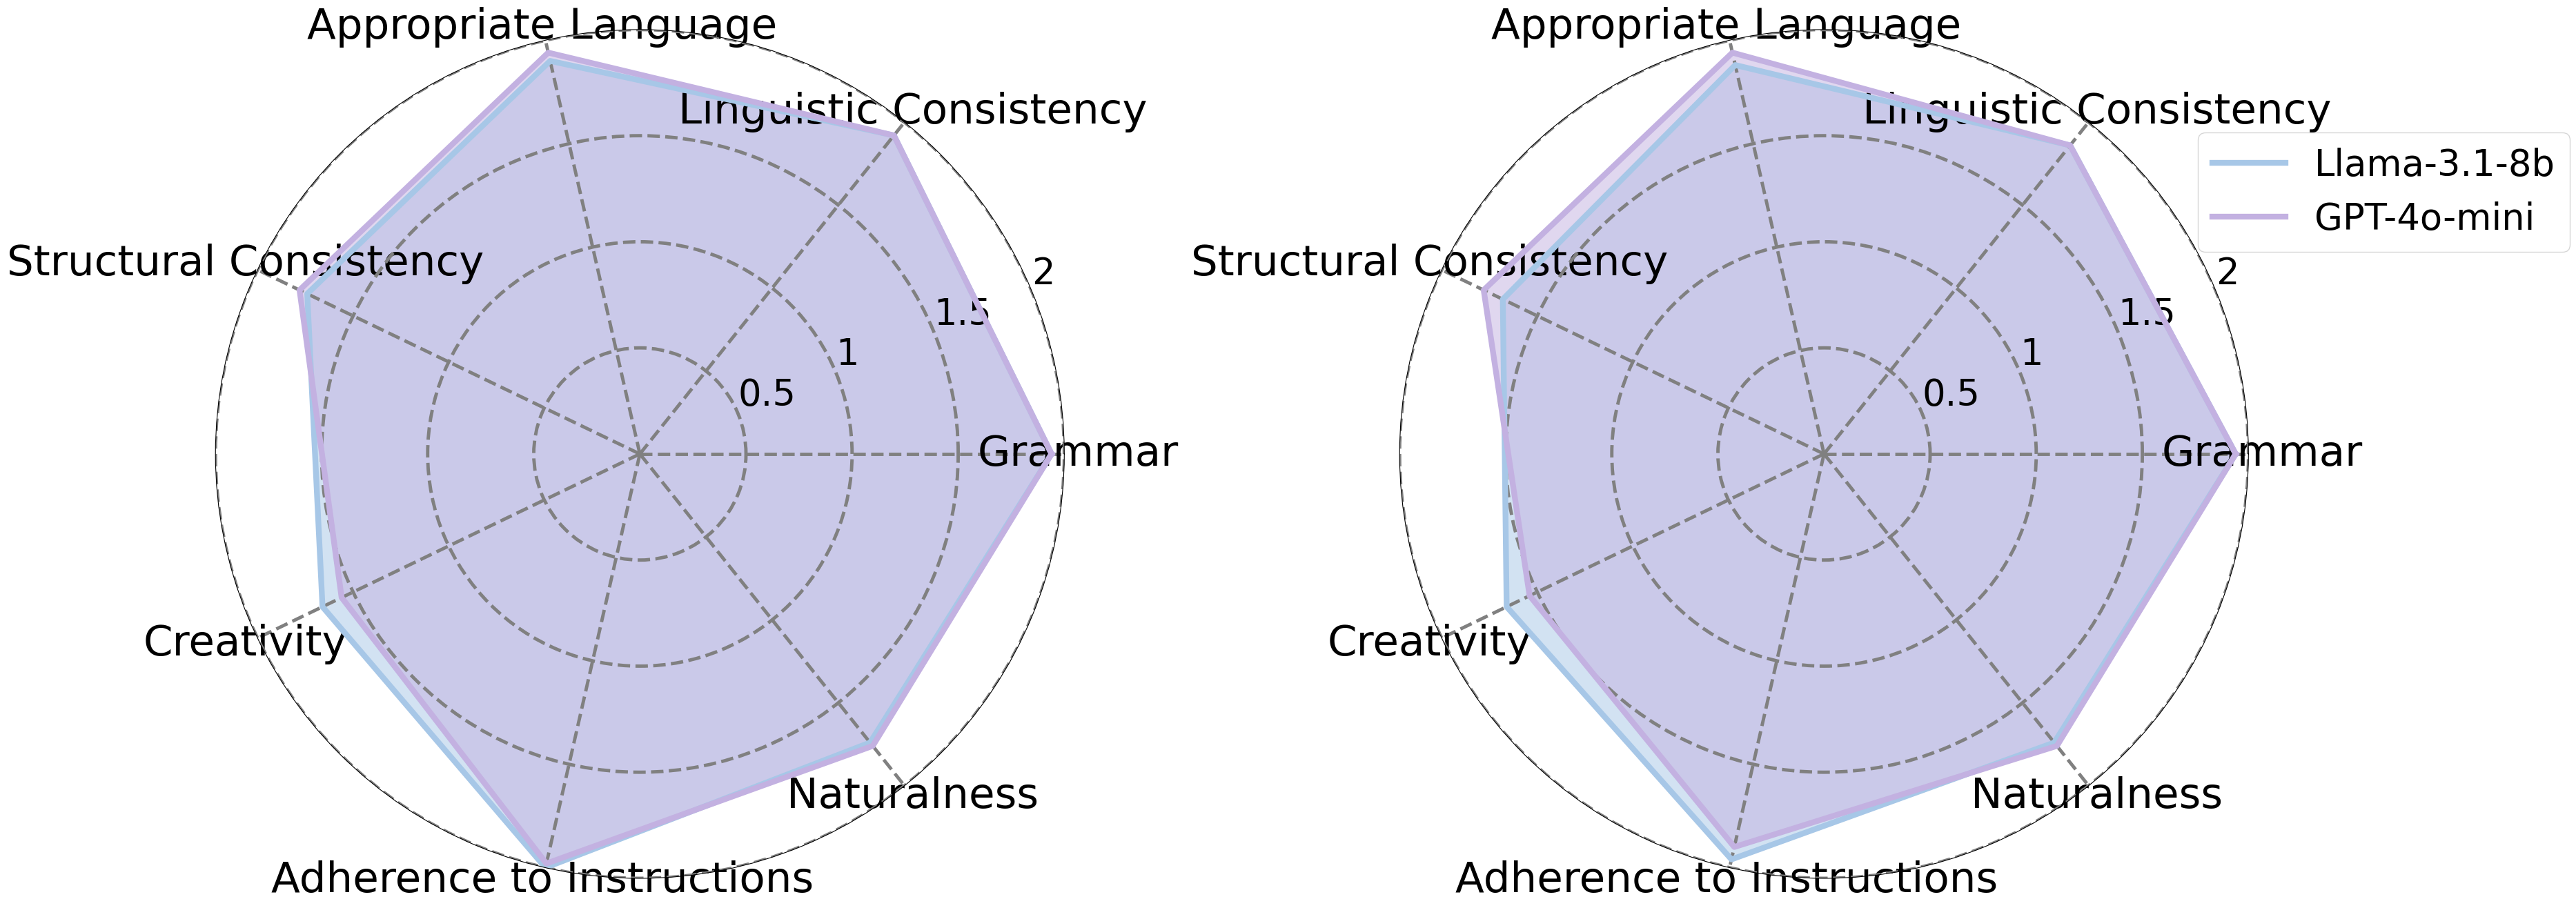

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

plt.rcParams.update({'font.size': 16})

def radar_chart_side_by_side(df_llama1, df_gpt1, df_llama2, df_gpt2):
    categories = list(df_llama1.columns)
    N = len(categories)

    # Calculate mean scores for each annotator and model
    scores_annotator1_llama = df_llama1.mean().tolist()
    scores_annotator1_gpt = df_gpt1.mean().tolist()
    scores_annotator2_llama = df_llama2.mean().tolist()
    scores_annotator2_gpt = df_gpt2.mean().tolist()

    # Complete the circle for radar chart
    scores_annotator1_llama += scores_annotator1_llama[:1]
    scores_annotator1_gpt += scores_annotator1_gpt[:1]
    scores_annotator2_llama += scores_annotator2_llama[:1]
    scores_annotator2_gpt += scores_annotator2_gpt[:1]

    # Define angles for radar chart
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Create the side-by-side radar charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(38, 18), subplot_kw=dict(polar=True))

    # First radar chart (Annotator 1)
    ax1.grid(linewidth=3.5, linestyle='--', color='gray')
    ax1.plot(angles, scores_annotator1_llama, linewidth=6, linestyle='solid', color='#A7C7E7', label='Llama-3.1-8b')
    ax1.fill(angles, scores_annotator1_llama, color='#A7C7E7', alpha=0.5)
    ax1.plot(angles, scores_annotator1_gpt, linewidth=6, linestyle='solid', color='#C3B1E1', label='GPT-4o-mini')
    ax1.fill(angles, scores_annotator1_gpt, color='#C3B1E1', alpha=0.5)
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(categories, fontsize=44)
    ax1.set_ylim(0, 2)
    ax1.set_yticks([0.5, 1, 1.5, 2])
    ax1.set_yticklabels(['0.5', '1', '1.5', '2'], fontsize=38)

    # Second radar chart (Annotator 2)
    ax2.grid(linewidth=3.5, linestyle='--', color='gray')
    ax2.plot(angles, scores_annotator2_llama, linewidth=6, linestyle='solid', label='Llama-3.1-8b', color='#A7C7E7')
    ax2.fill(angles, scores_annotator2_llama, color='#A7C7E7', alpha=0.5)
    ax2.plot(angles, scores_annotator2_gpt, linewidth=6, linestyle='solid', label='GPT-4o-mini', color='#C3B1E1')
    ax2.fill(angles, scores_annotator2_gpt, color='#C3B1E1', alpha=0.5)
    ax2.set_xticks(angles[:-1])
    ax2.set_xticklabels(categories, fontsize=44)
    ax2.set_ylim(0, 2)
    ax2.set_yticks([0.5, 1, 1.5, 2])
    ax2.set_yticklabels(['0.5', '1', '1.5', '2'], fontsize=38)
    ax2.legend(loc='upper right', bbox_to_anchor=(1.4, 0.9), fontsize=38)

    plt.tight_layout()
    plt.savefig("llm-comparison.png", format="png", dpi=300)
    plt.show()

# Dataframes from Annotator 1 (a1) and Annotator 2 (a2)
df_llama_annotator1 = a1["Llama-3.1-8b"].drop("Score", axis=1)
df_gpt_annotator1 = a1["GPT-4o-mini"].drop("Score", axis=1)

df_llama_annotator2 = a2["Llama-3.1-8b"].drop("Score", axis=1)
df_gpt_annotator2 = a2["GPT-4o-mini"].drop("Score", axis=1)

# Generate radar charts side-by-side for both annotators
radar_chart_side_by_side(df_llama_annotator1, df_gpt_annotator1, df_llama_annotator2, df_gpt_annotator2)


In [140]:
import pandas as pd

appropriate = pd.read_csv("content moderation/Appropriate.csv")
appropriate.head()

,NUMBER,STORY NAME,STORY TEXT
0,2,Buckwheat,"""If you should chance, after a tempest, to cro..."
1,3,Flax,"""The flax was in full bloom, adorned with pret..."
2,5,Money Box,"""In a nursery where a number of toys lay scatt..."
3,11,The Teapot,"""There was once a proud teapot; it was proud o..."
4,13,What One Can Invent,"""There was once a young man who was studying t..."


In [141]:
inappropriate = pd.read_csv("content moderation/Inappropriate.csv")
inappropriate.head()

,NUMBER,STORY NAME,STORY TEXT
0,4,Goblin Huckster,"""There was once a regular student who lived in..."
1,6,Old Street Lamp,"""Did you ever hear the story of the old street..."
2,1,Brave Tin Soldier,"""There were once five-and-twenty tin soldiers,..."
3,9,Snail Rose Tree,"""Round about the garden ran a hedge of hazel-b..."
4,10,Snow Man,"""""It is so delightfully cold,\"" said the Snow ..."


In [198]:
SYSTEM_PROMPT = """You are a content moderator. Your task is to review the given story. The story should be appropriate for children of age group 7 to 12 3rd to 6th graders).
Always answer in the following format:
### Reasoning:
...add reasoning here...

### Is Appropriate: True/False"""

In [199]:
from together import Together
from openai import OpenAI

In [200]:
# client = Together()
client = OpenAI()

In [201]:
from tqdm import tqdm

# outputs = []

for i in tqdm(range(50)):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": appropriate.iloc[i]["STORY TEXT"]}
        ],
        temperature=0,
    )
    output = response.choices[0].message.content
    outputs.append(output)

outputs = outputs[0:50]

for i in tqdm(range(50)):
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": inappropriate.iloc[i]["STORY TEXT"]}
        ],
        temperature=0,
    )
    output = response.choices[0].message.content
    outputs.append(output)

100%|██████████████████████████████████████████████████████████| 50/50 [01:32<00:00,  1.85s/it]


In [195]:
import json

with open("content moderation/gpt-4o.json", "w") as f:
    json.dump(outputs, f)

In [202]:
acc = 0
b = 0
fp = 0

for i in range(50):
    if "True" in outputs[i]:
        acc += 1

for i in range(50, 100):
    if "False" in outputs[i]:
        b += 1
        acc += 1
    else:
        fp += 1

In [203]:
acc, fp, b

(90, 9, 41)